In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import string
sb.set()

In [2]:
data = pd.read_csv('games.csv')
data.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [3]:
sb.set()

In [4]:
print("Data type : ", type(data))
print("Data dims : ", data.shape)
print(data.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (71716, 39)
AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                        object
Header image                   object
Website                        object
Support url                    object
Support email                  object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
Metacritic url                 object
User score                      int64
Positive                        int64
Negative                        int64
Score rank  

### Formating Data
For our project, we will be analysing on whether the Genres, Price, Metacritic Score and Length of description will correlate with the success of a game. The success of a game will be defined by the number of estimated owners.

Before we begin, we need to prep the data.
As the number of owners given to us is a range of estimated owner, such as "0 - 20000", therefore we will reformat this range into a ranking from "0" to "13". "0" refers to the least number of estimated owners of "0 - 0", while "13" refers to the most number of estimated owners of "100000000 - 200000000". We will also compute the description length by counting the number of characters in the "About the game" column.

In [5]:
data2 = pd.DataFrame(data[["Name", "Genres", "Estimated owners", "Price", "Metacritic score", "About the game"]])

In [6]:
data2['Ownership ranking'] = data2['Estimated owners'].map({'0 - 0': 0, '0 - 20000': 1, '100000 - 200000': 4,\
                                                           '1000000 - 2000000': 7, '10000000 - 20000000': 10,\
                                                           '100000000 - 200000000': 13, '20000 - 50000': 2,\
                                                           '200000 - 500000': 5, '2000000 - 5000000': 8,\
                                                           '20000000 - 50000000': 11, '50000 - 100000': 3,\
                                                           '500000 - 1000000': 6, '5000000 - 10000000': 9,\
                                                           '50000000 - 100000000': 12})

In [7]:
data2['Estimated owners'] = data2['Estimated owners'].map({'0 - 0': 0, '0 - 20000': 10000, '100000 - 200000': 150000,\
                                                           '1000000 - 2000000': 1500000, '10000000 - 20000000': 15000000,\
                                                           '100000000 - 200000000': 150000000, '20000 - 50000': 35000,\
                                                           '200000 - 500000': 350000, '2000000 - 5000000': 3500000,\
                                                           '20000000 - 50000000': 35000000, '50000 - 100000': 75000,\
                                                           '500000 - 1000000': 750000, '5000000 - 10000000': 7500000,\
                                                           '50000000 - 100000000': 75000000})

In [8]:
data2["Description length"] = data2["About the game"].str.len()

In [9]:
data2

,Name,Genres,Estimated owners,Price,Metacritic score,About the game,Ownership ranking,Description length
0,Galactic Bowling,"Casual,Indie,Sports",10000,19.99,0,Galactic Bowling is an exaggerated and stylize...,1,1043.0
1,Train Bandit,"Action,Indie",10000,0.99,0,THE LAW!! Looks to be a showdown atop a train....,1,491.0
2,Jolt Project,"Action,Adventure,Indie,Strategy",10000,4.99,0,Jolt Project: The army now has a new robotics ...,1,628.0
3,Henosis™,"Adventure,Casual,Indie",10000,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,1,615.0
4,Two Weeks in Painland,"Adventure,Indie",10000,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,1,672.0
...,...,...,...,...,...,...,...,...
71711,SUR5,"Free to Play,Indie,Massively Multiplayer,Strat...",0,0.00,0,"Innovative Gameplay SUR5 brings a brand new, f...",0,810.0
71712,Prison Life 2,"Casual,Indie,RPG,Simulation,Strategy",10000,10.79,0,Core Features Real players only! All Guards an...,1,2117.0
71713,Architecture Zeitgeist,"Casual,Simulation,Early Access",10000,5.99,0,Architecture Zeitgeist is a game created with ...,1,1481.0
71714,Girl's Way to Survive 2: Bloody Museum,"Action,Casual,Indie,RPG,Early Access",0,2.39,0,"Development progress: prologue map (finished),...",0,2177.0


## Exploring dataset

### 1) Price against Ownership Ranking

We first begin by seeing how a price could relate to the ownership ranking.

In [262]:
data3 = pd.DataFrame(data2[["Ownership ranking", "Price"]])

<Axes: xlabel='Ownership ranking', ylabel='Price'>

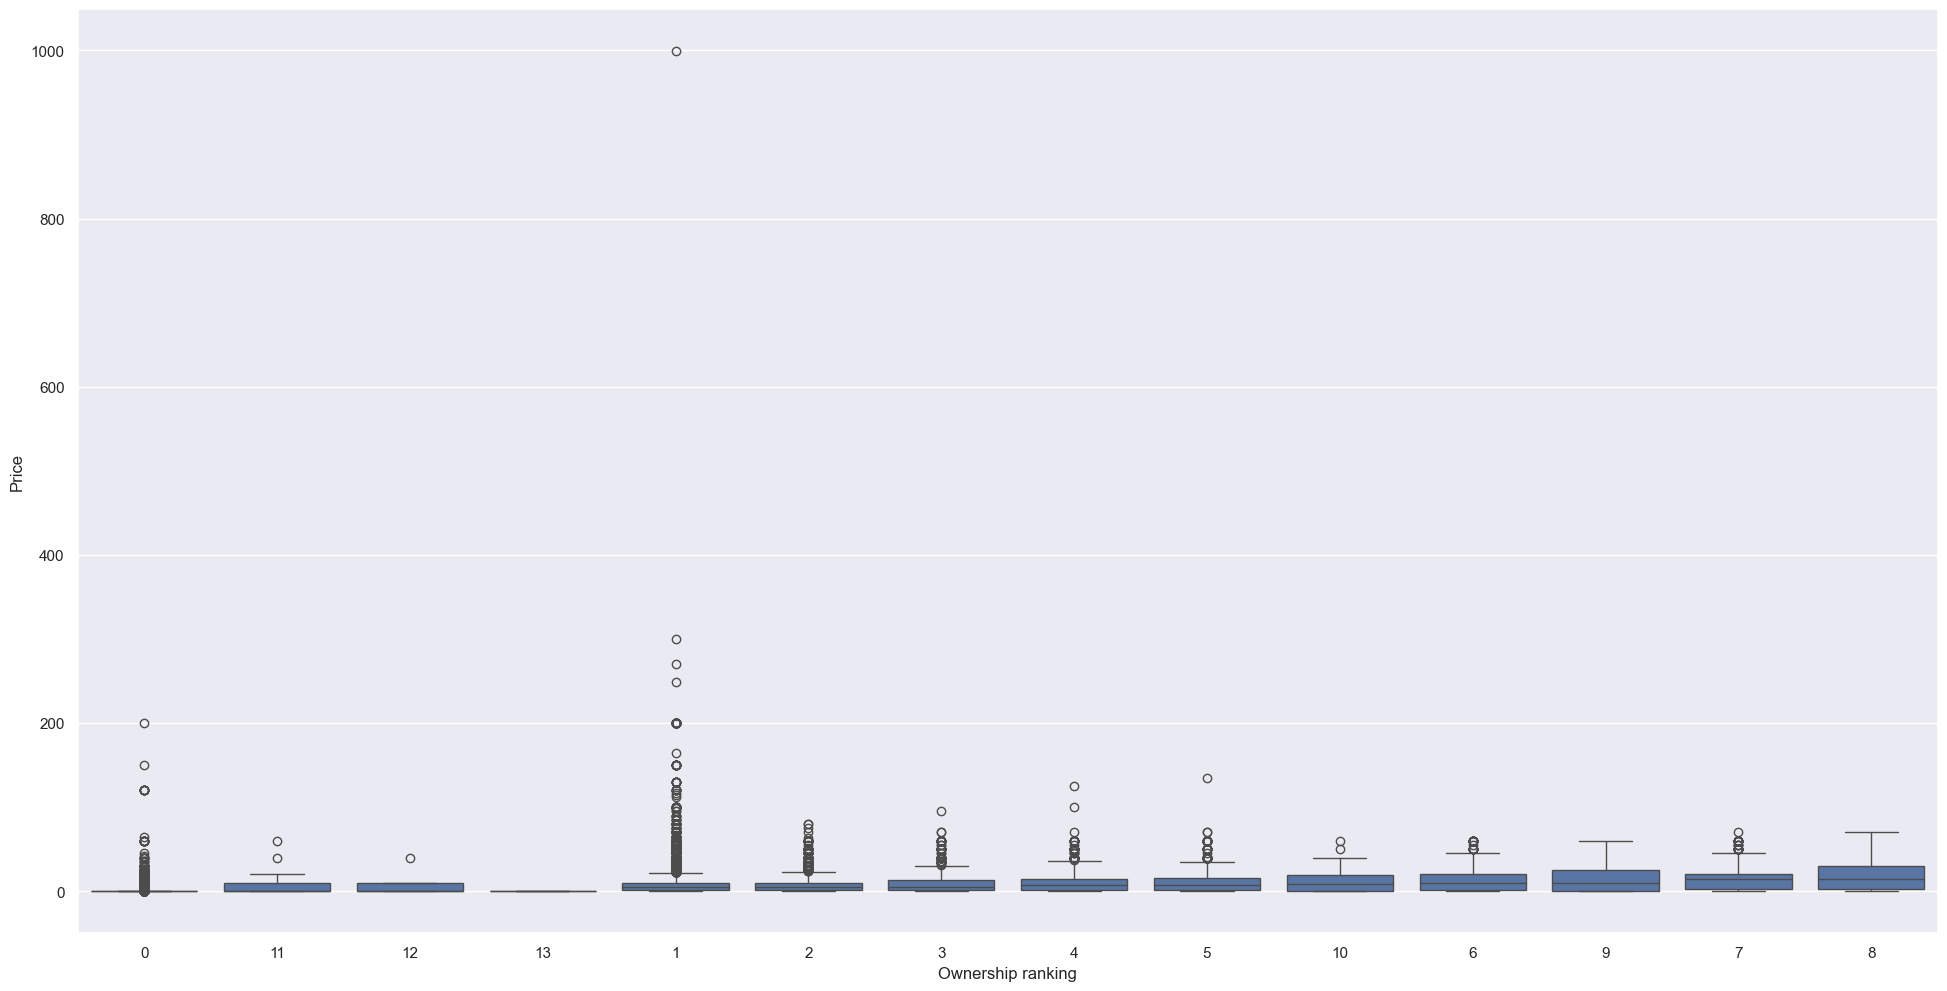

In [263]:
# Draw the distributions of all variables
f, axes = plt.subplots(1, 1, figsize=(24, 12))

grp = data3.loc[:,['Ownership ranking', 'Price']].groupby(['Ownership ranking']).median().sort_values(by='Price')
sb.boxplot(data = data3, x = data3['Ownership ranking'], y=data3['Price'], orient = "v", order=grp.index)

As seen from the graph above, the boxplot is extremely small. This is due to outliers of a few very expensive games. So we will now remove these outliers.

In [264]:
cols = ['Price']

Q1 = data2[cols].quantile(0.25)
Q3 = data2[cols].quantile(0.75)
IQR = Q3 - Q1

data3 = data3[~((data3[cols] <= (Q1 - 1.5 * IQR)) |(data3[cols] >= (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: xlabel='Ownership ranking', ylabel='Price'>

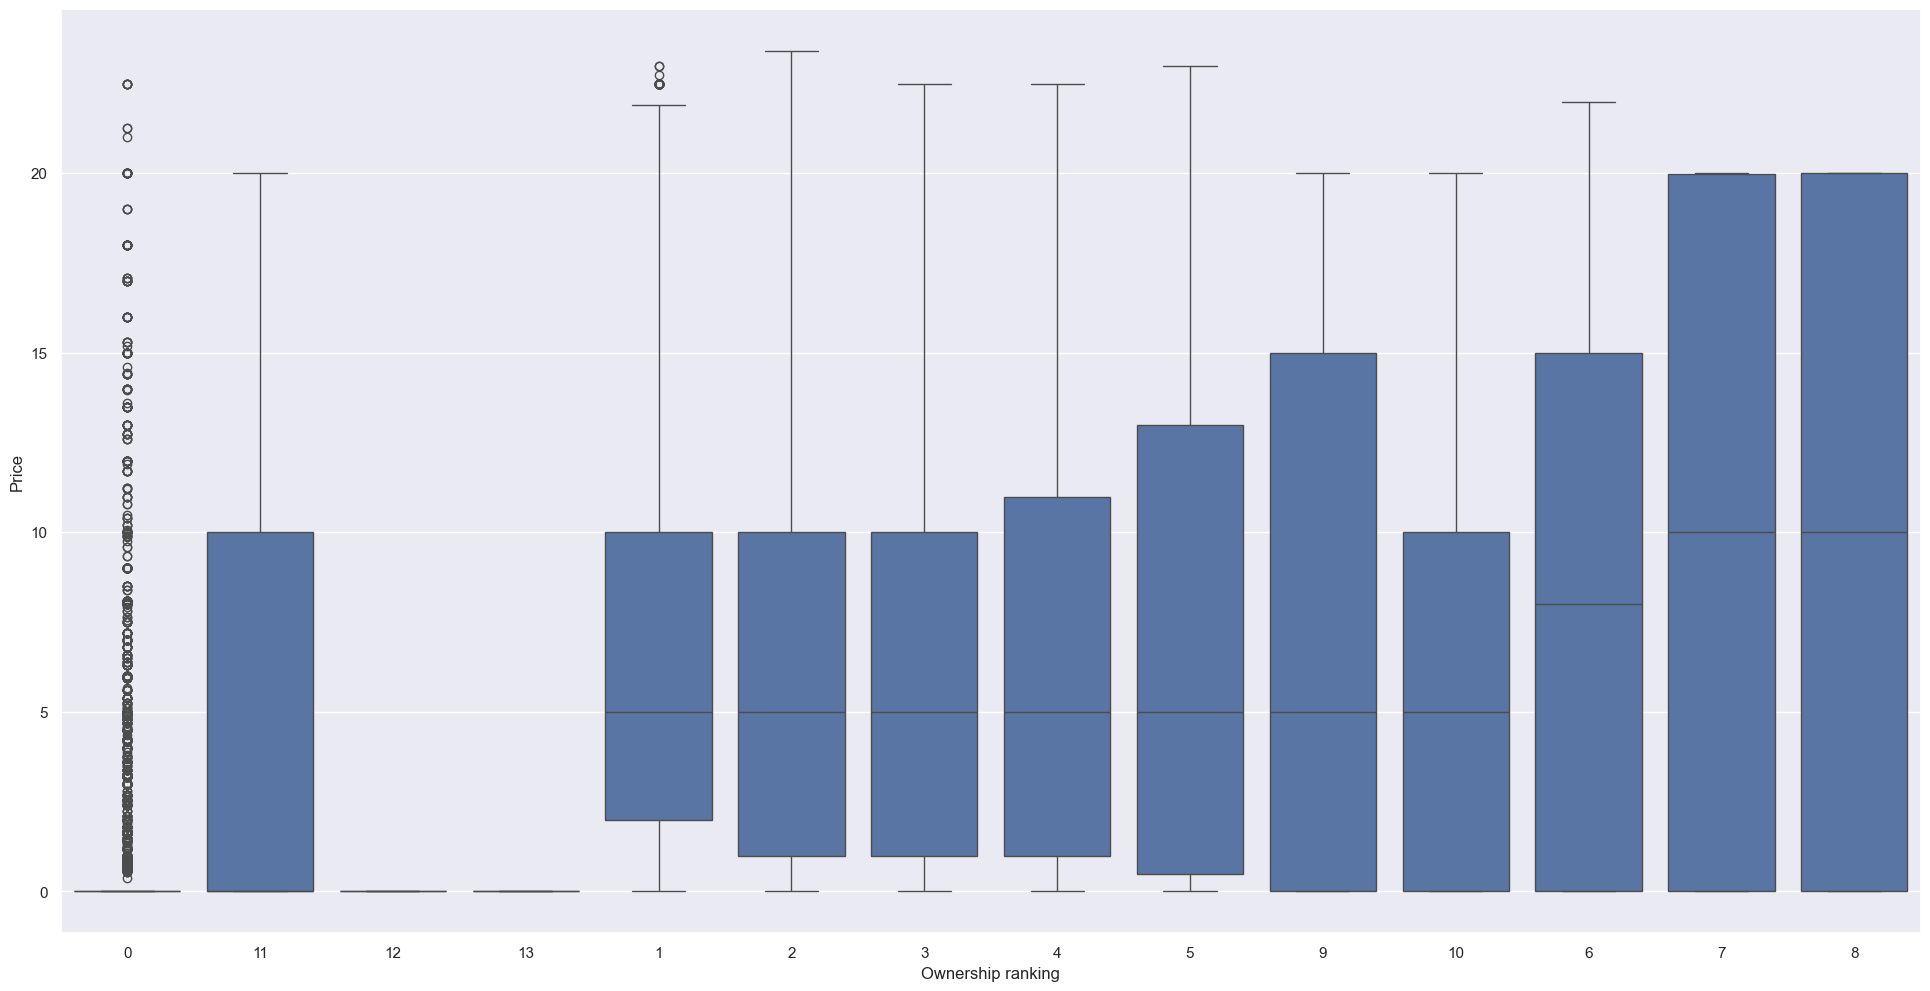

In [265]:
# Draw the distributions of all variables
f, axes = plt.subplots(1, 1, figsize=(24, 12))

grp = data3.loc[:,['Ownership ranking', 'Price']].groupby(['Ownership ranking']).median().sort_values(by='Price')
sb.boxplot(data = data3, x = data3['Ownership ranking'], y=data3['Price'], orient = "v", order=grp.index)

In [266]:
print(data3.corr())

                   Ownership ranking     Price
Ownership ranking           1.000000  0.179628
Price                       0.179628  1.000000


While the above graph does look better, it is still a bit skewed. This is most likely because there are a lot of free games out on the market. This means that users can easily "claim ownership" of a free game. This can be seen from the games rated with the highest ownership ranking of 12 and 13 having a price tag of $0.

And so the overall average price for the games in each ownership ranking could be pulled down. Hence, price may not be a good indicator for a good selling game, thus explaining the lower correlation between price and ownership ranking.

### 2) Metacritic Score against Ownership Ranking

Next, we would like to see how Metacritic Score could affect the Ownership Ranking of games.

In [267]:
data3 = pd.DataFrame(data2[["Ownership ranking", "Metacritic score"]])

<Axes: xlabel='Ownership ranking', ylabel='Metacritic score'>

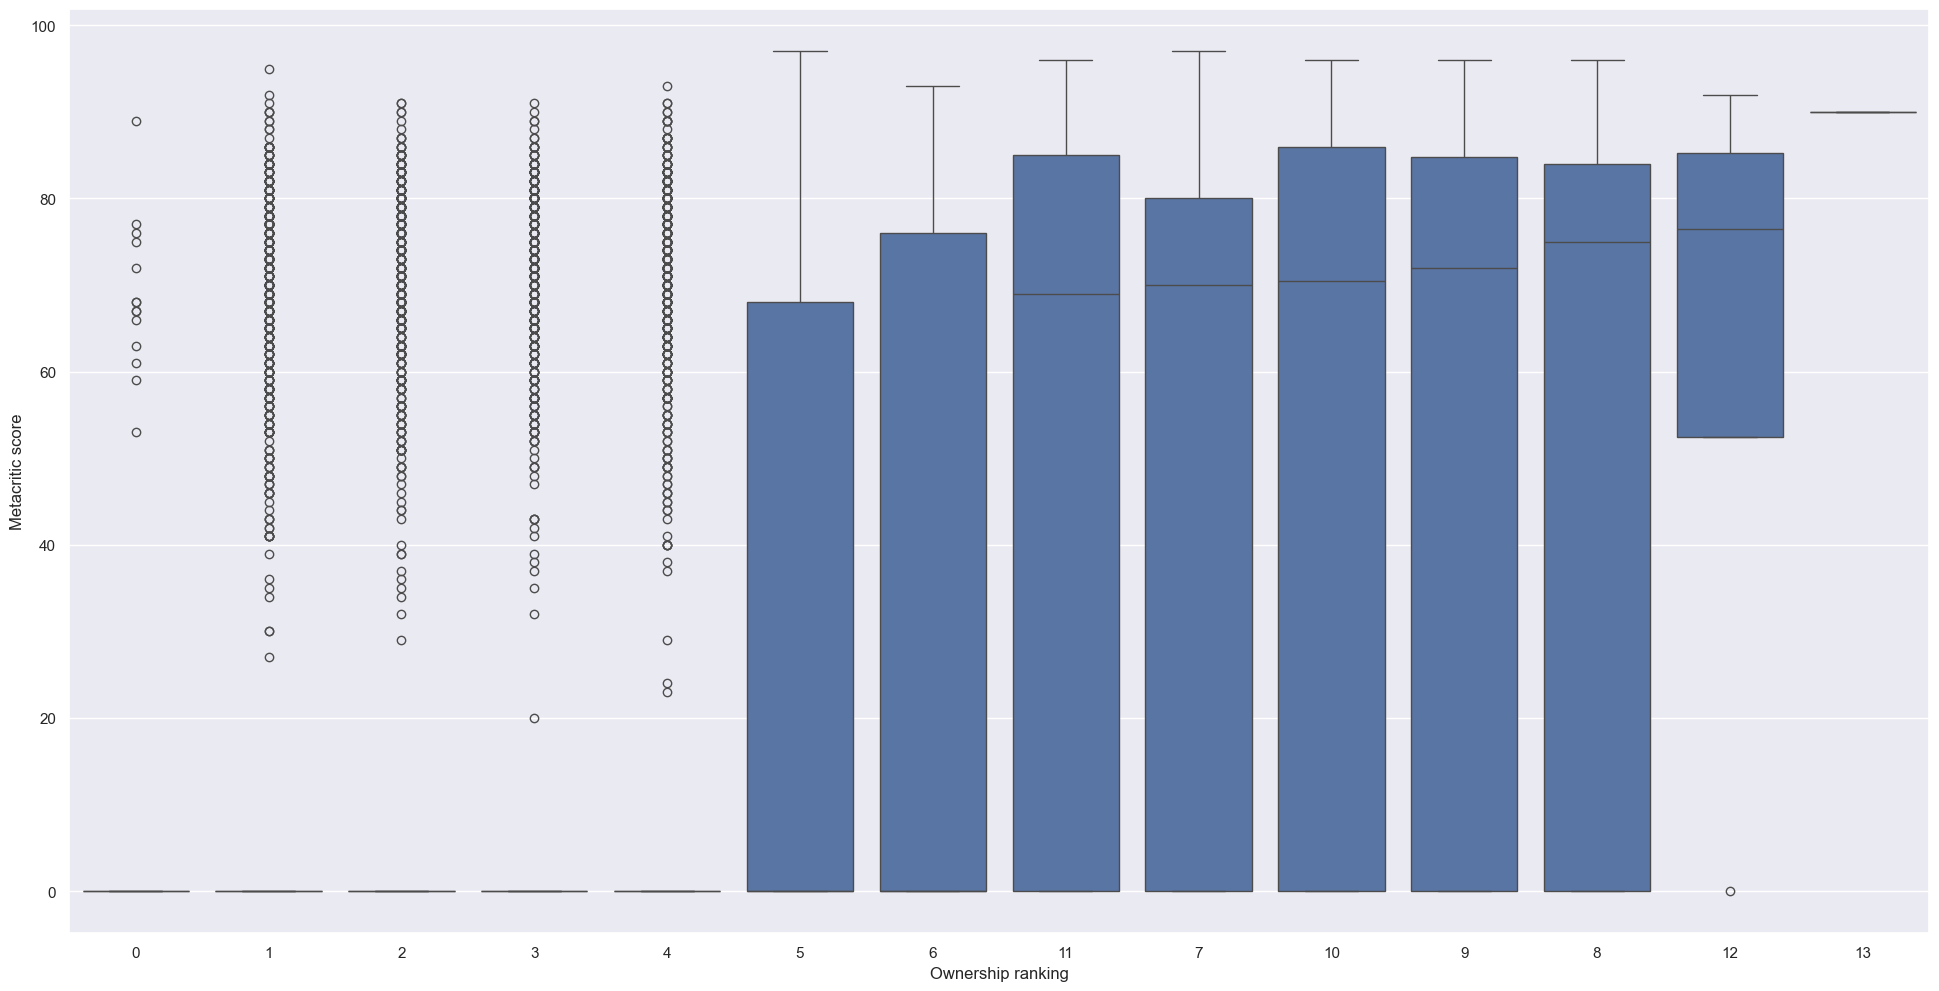

In [268]:
# Draw the distributions of all variables
f, axes = plt.subplots(1, 1, figsize=(24, 12))

grp = data3.loc[:,['Ownership ranking', 'Metacritic score']].groupby(['Ownership ranking']).median().sort_values(by='Metacritic score')
sb.boxplot(data = data3, x = data3['Ownership ranking'], y=data3['Metacritic score'], orient = "v", order=grp.index)

In [269]:
print(data3.corr())

                   Ownership ranking  Metacritic score
Ownership ranking           1.000000          0.463794
Metacritic score            0.463794          1.000000


As seen from the graph above, games that are rated higher by Metacritic generally also garner higher ownership. This can also be seen from the higher correlation score between the Metacritic score and Ownership ranking.

However, as it is impossible for Metacritic to rate every single video games out in the market, therefore in our data set as seen above, there a quite a lot of games rated "0". This is especially true for games that are "less popular" in the 0 to 4 rankings, whereby the boxplot is practically invisible as majority of the games in those ranking have not been rated. A few games in the 5 to 11 rankings have also not been rated by Metacritics, hence the bottom of the boxplot stretches to 0 as well.

While it is not a perfect indicator, but generally a better Metacritic score would translate to a better selling game. Therefore, if one would like to publish their game, perhaps they could try and get Metacritic to rate their game, and hope it is well received.

To attempt to remove the skew to 0, we will remove data that have not been rated by Metacritic.

In [11]:
data3 = pd.DataFrame(data2[["Ownership ranking", "Metacritic score"]])
data3 = data3[data3['Metacritic score']>0]

<Axes: xlabel='Ownership ranking', ylabel='Metacritic score'>

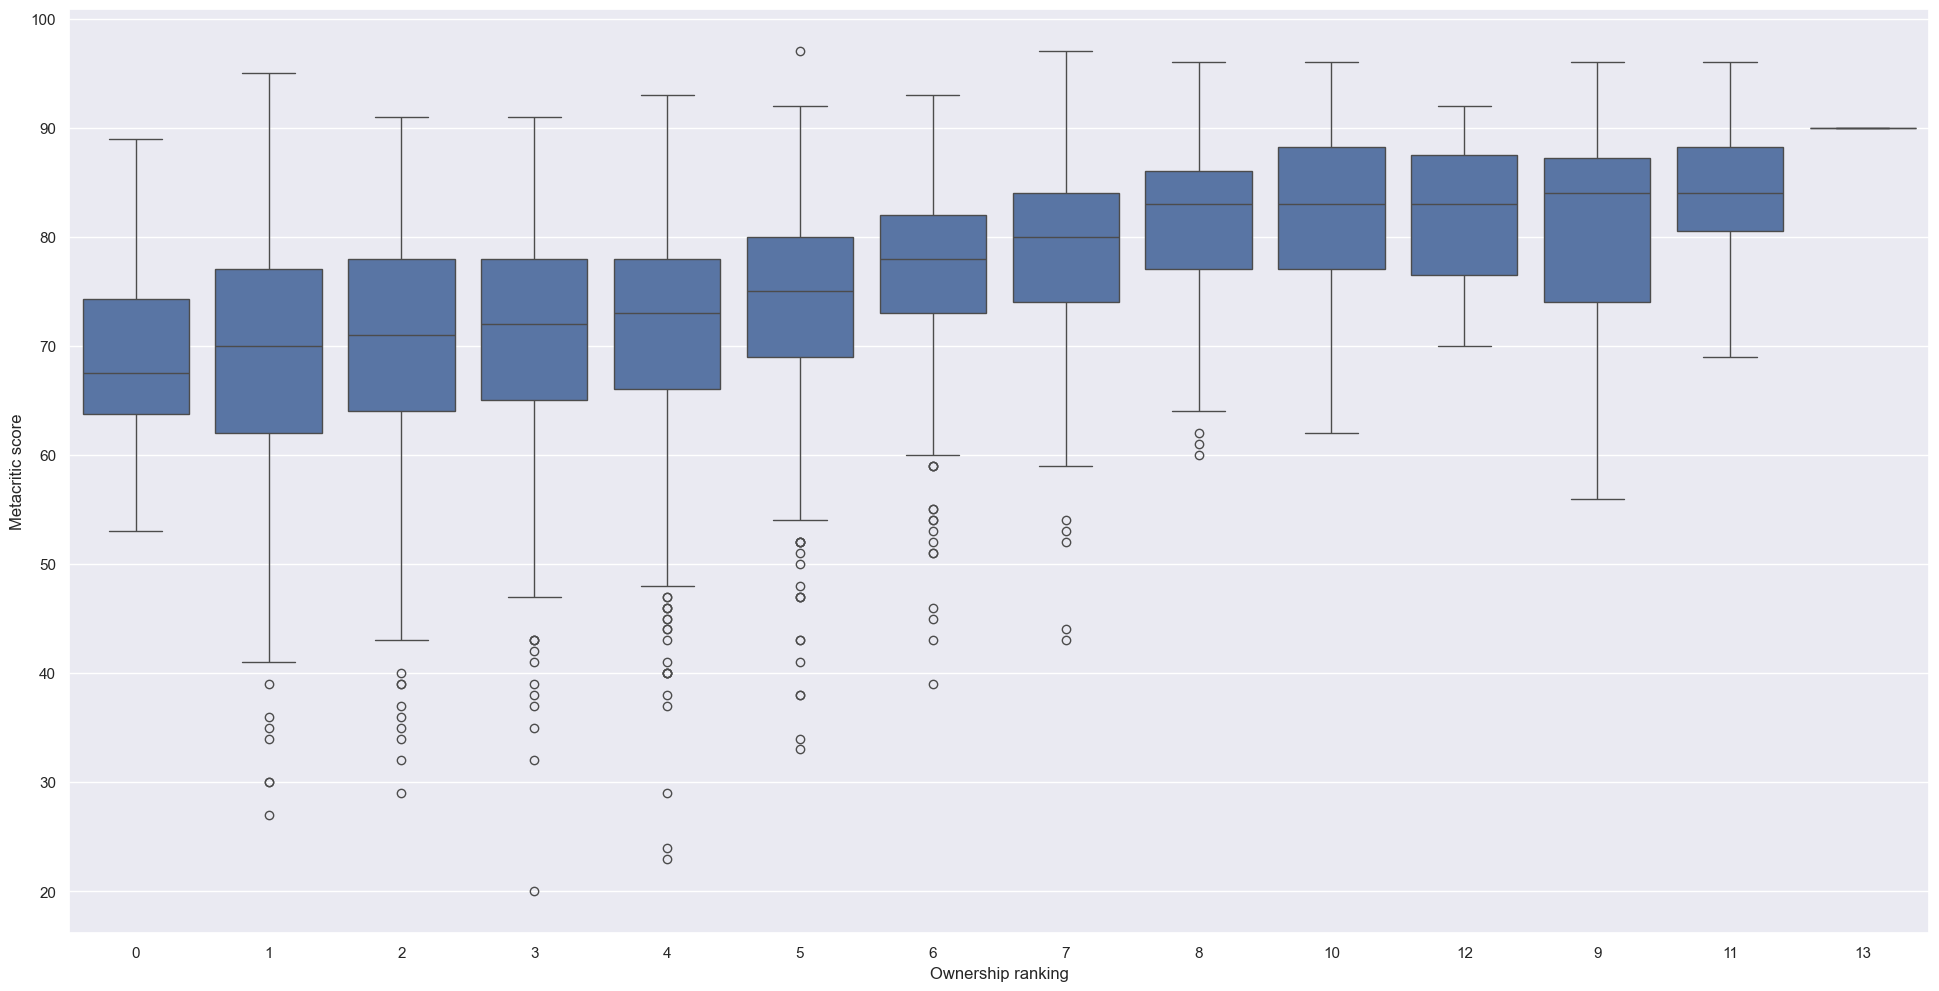

In [12]:
# Draw the distributions of all variables
f, axes = plt.subplots(1, 1, figsize=(24, 12))

grp = data3.loc[:,['Ownership ranking', 'Metacritic score']].groupby(['Ownership ranking']).median().sort_values(by='Metacritic score')
sb.boxplot(data = data3, x = data3['Ownership ranking'], y=data3['Metacritic score'], orient = "v", order=grp.index)

In [13]:
print(data3.corr())

                   Ownership ranking  Metacritic score
Ownership ranking           1.000000          0.357619
Metacritic score            0.357619          1.000000


While the correlation is lower, but it is quite apparent that the median metacritic score is generally higher for games that have higher ownership. Therefore, metacritic score could be a decent indicator for the success of a game.

### 3) Genres against Ownership Ranking

Next, we would like to see which genre of games would sell better.

As some games span multiple genre, we decided to count each genre in each game separately. And so, we will need to split the data and reformat our DataFrame.

In [332]:
data3 = pd.DataFrame(data2[["Genres", "Ownership ranking"]])

In [333]:
data3['Genres'] = data3['Genres'].str.split(',')
data3 = data3.explode('Genres')
data3 = data3.reset_index()
data3 = pd.DataFrame(data3[["Genres", "Ownership ranking"]])

Genres
Indie                    48827
Action                   28870
Casual                   28817
Adventure                26634
Simulation               13590
Strategy                 13218
RPG                      12079
Early Access              8337
Free to Play              5638
Sports                    3184
Racing                    2567
Massively Multiplayer     1802
Utilities                  745
Violent                    509
Design & Illustration      444
Education                  363
Animation & Modeling       362
Gore                       305
Video Production           259
Game Development           189
Software Training          184
Audio Production           183
Photo Editing              118
Nudity                     117
Sexual Content             106
Web Publishing             101
Accounting                  22
Movie                        2
Documentary                  1
Episodic                     1
Short                        1
Tutorial                     1
3

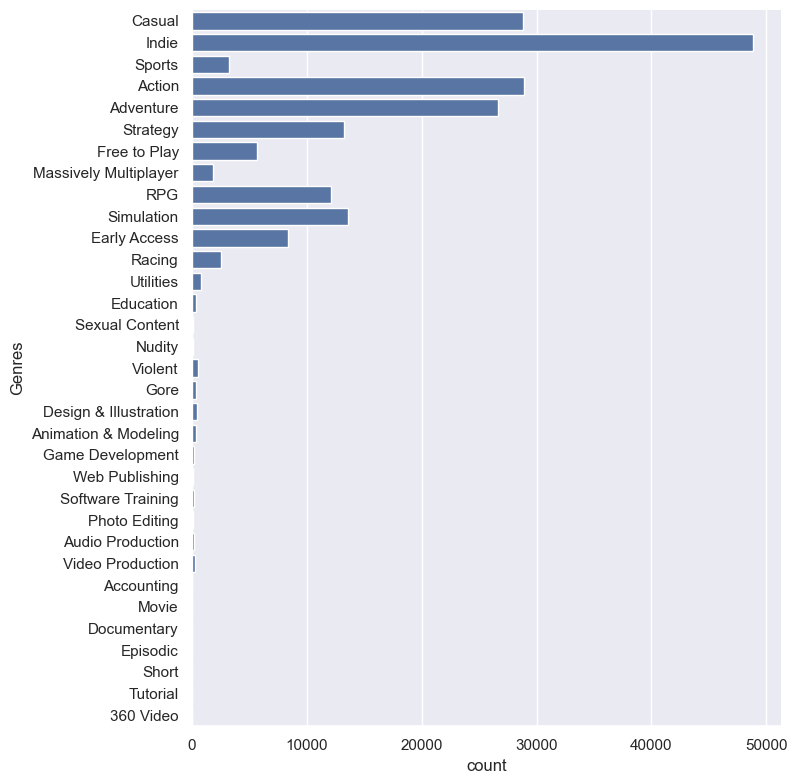

In [334]:
print(data3["Genres"].value_counts())
sb.catplot(y = "Genres", data = data3, kind = "count", height = 8)

Most of the video games out in the market are indie games. But does this mean indie games sell the best?

In [335]:
data3["Count"] = 1
data3 = data3.groupby(["Genres", "Ownership ranking"])["Count"].count().reset_index()
data3 = data3.set_index(['Genres','Ownership ranking']).unstack(fill_value=0).stack().reset_index()
data3
data3 = data3.pivot(index="Genres",columns="Ownership ranking", values="Count")

C:\Users\jerra\AppData\Local\Temp\ipykernel_12932\2554456465.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data3 = data3.set_index(['Genres','Ownership ranking']).unstack(fill_value=0).stack().reset_index()


<Axes: xlabel='Ownership ranking', ylabel='Genres'>

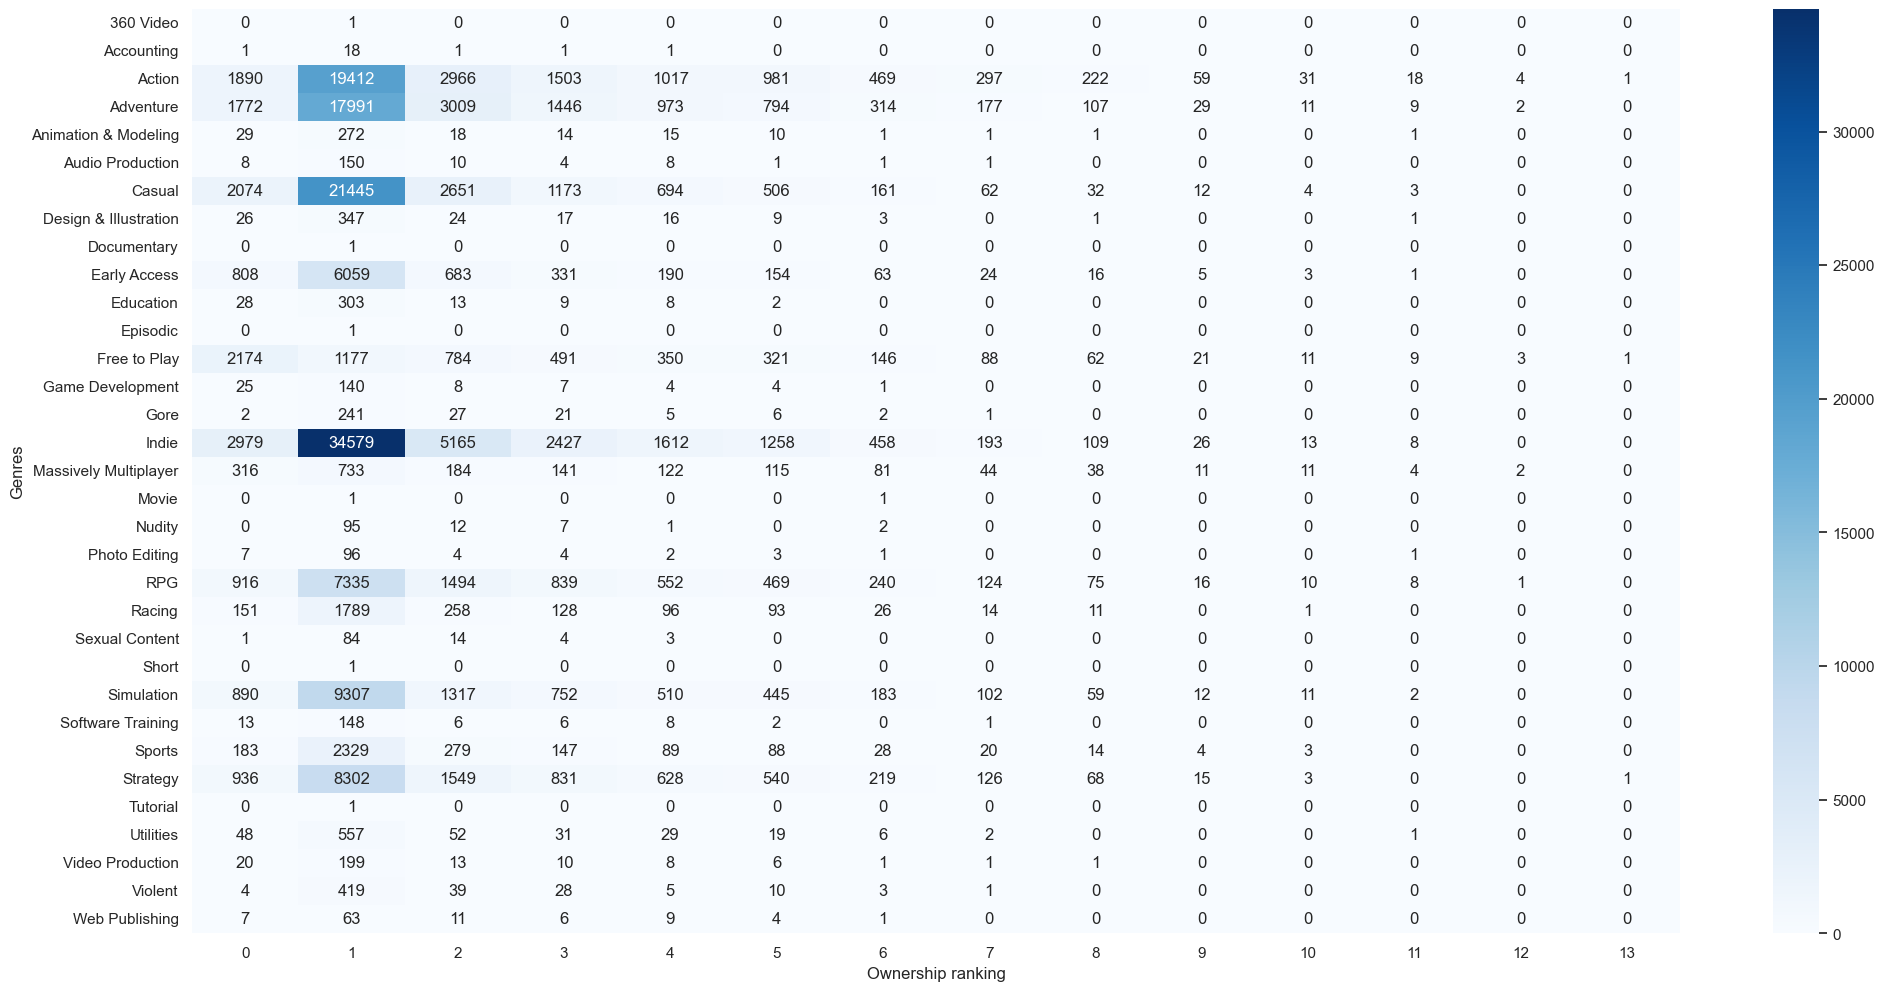

In [338]:
# Draw the distributions of all variables
f, axes = plt.subplots(1, 1, figsize=(24, 12))

sb.heatmap(data=data3, annot=True, fmt='g', cmap = "Blues") 

As seen from the above heatmap, majority of indie games are only in ranking 1. It still is not clear at a glance which genre will translate to a higher ownership ranking, so we will eliminate the lower ownership ranking.

In [345]:
data3 = pd.DataFrame(data2[["Genres", "Ownership ranking"]])
dropped = data3[ (data3['Ownership ranking'] >= 0) & (data3['Ownership ranking'] <= 5) ].index
data3.drop(dropped , inplace=True)
data3 = data3.reset_index()
data3['Genres'] = data3['Genres'].str.split(',')
data3 = data3.explode('Genres')
data3 = data3.reset_index()
data3 = pd.DataFrame(data3[["Genres", "Ownership ranking"]])
data3

,Genres,Ownership ranking
0,Action,8
1,Adventure,8
2,Racing,8
3,Action,6
4,Adventure,6
...,...,...
4907,RPG,6
4908,Simulation,6
4909,Strategy,6
4910,Action,6


In [346]:
data3["Count"] = 1
data3 = data3.groupby(["Genres", "Ownership ranking"])["Count"].count().reset_index()
data3 = data3.set_index(['Genres','Ownership ranking']).unstack(fill_value=0).stack().reset_index()
data3
data3 = data3.pivot(index="Genres",columns="Ownership ranking", values="Count")

C:\Users\jerra\AppData\Local\Temp\ipykernel_12932\2554456465.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data3 = data3.set_index(['Genres','Ownership ranking']).unstack(fill_value=0).stack().reset_index()


<Axes: xlabel='Ownership ranking', ylabel='Genres'>

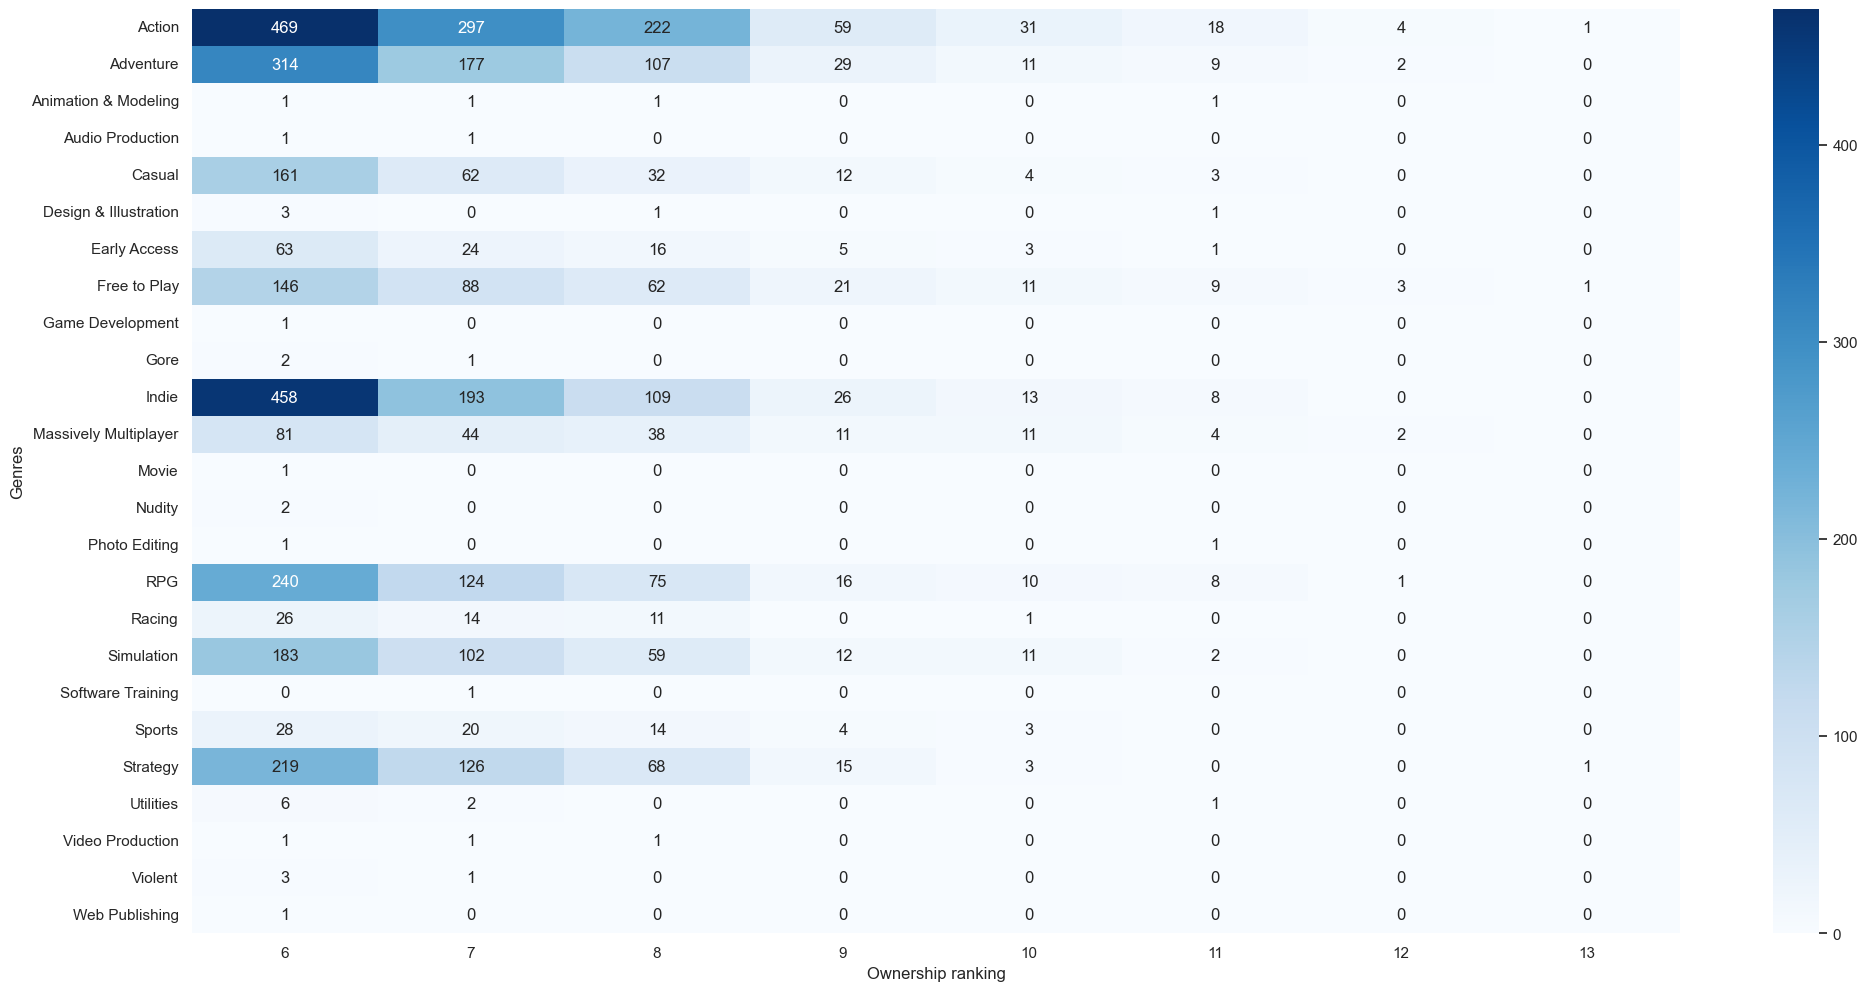

In [347]:
# Draw the distributions of all variables
f, axes = plt.subplots(1, 1, figsize=(24, 12))

sb.heatmap(data=data3, annot=True, fmt='g', cmap = "Blues") 

It is now much clearer that Action, Indie and Adventure games sell better in the market from the heatmap above.
Casual, RPG, Simulation and Strategy games also does moderately well.

Some extremely niche genres should be avoided as it does not seem to appeal to the consumers, such as "Game Development" and "Web Publishing" games.

### 4) Description length against Ownership ranking

Lastly, we would like to see if the length of the "About the game" section could mean a higher ownership ranking. This hypothesis was thought about as a descriptive and well-explained description of the game could mean that consumers are more likely to buy a game.

In [438]:
data3 = pd.DataFrame(data2[["Ownership ranking", "Description length"]])

<Axes: xlabel='Ownership ranking', ylabel='Description length'>

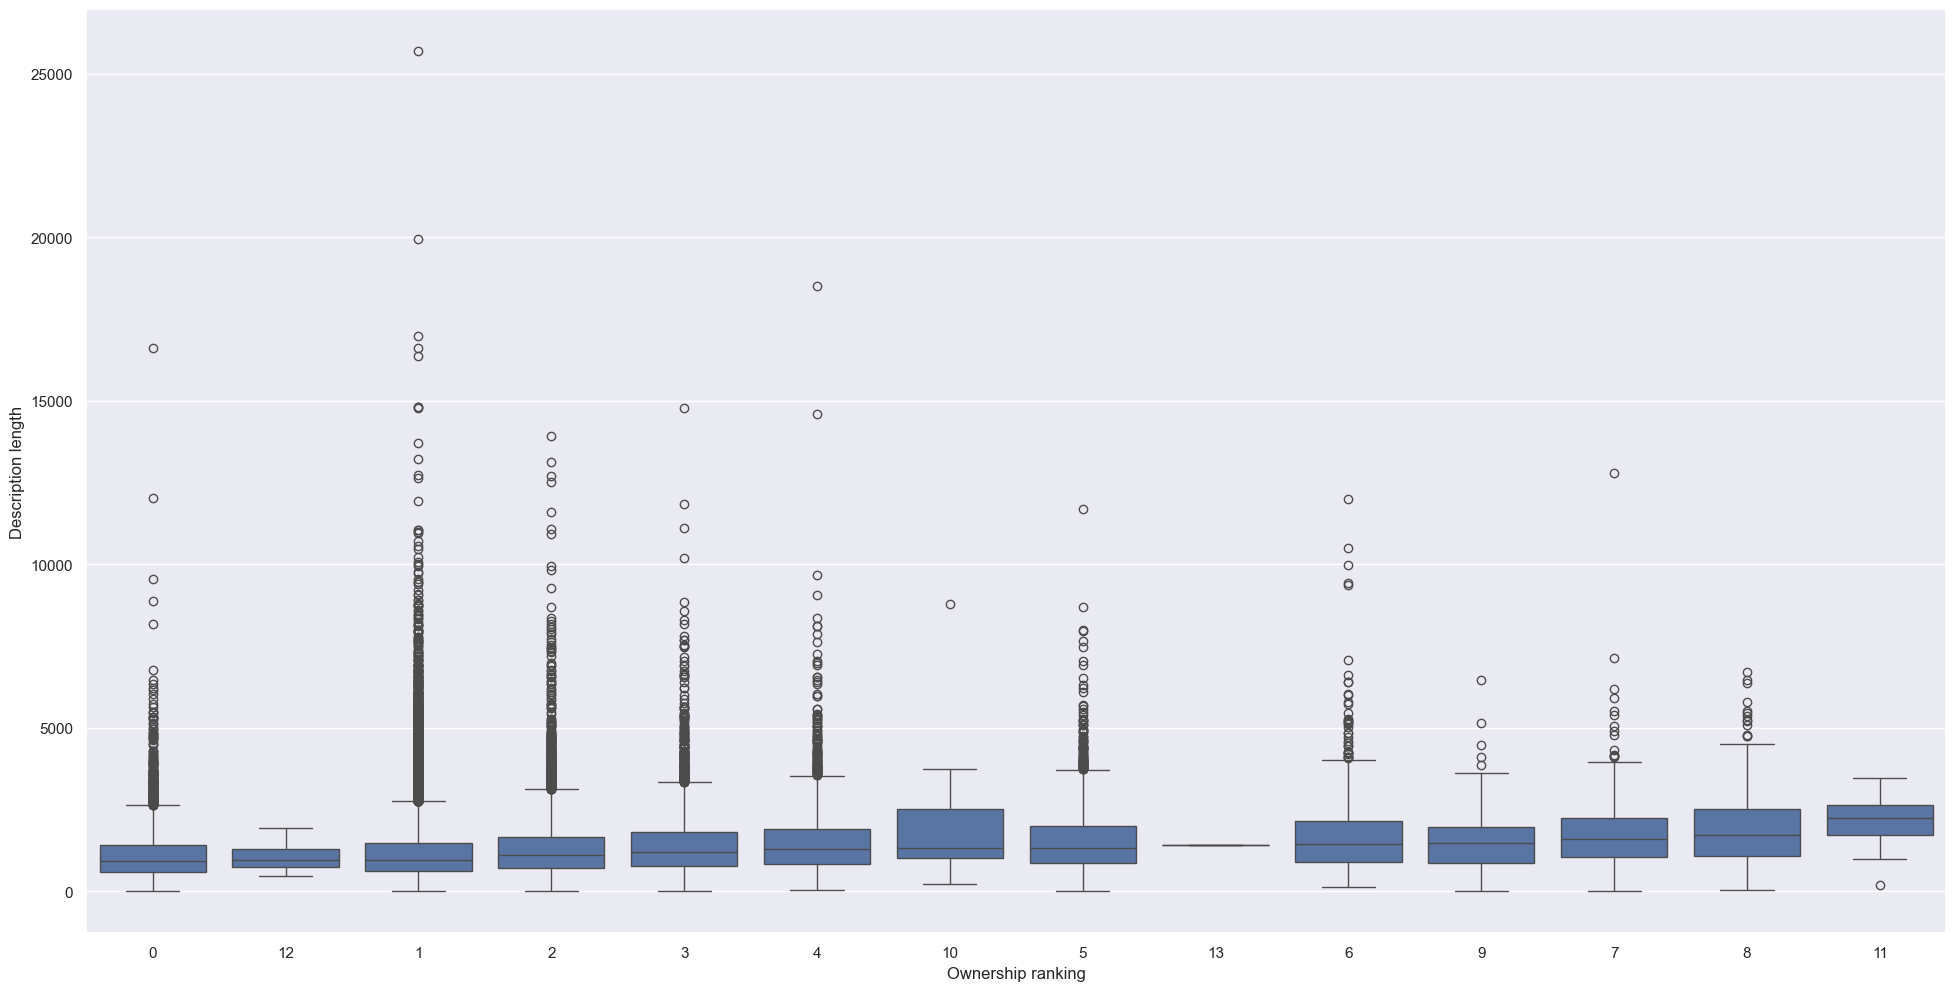

In [439]:
# Draw the distributions of all variables
f, axes = plt.subplots(1, 1, figsize=(24, 12))

grp = data3.loc[:,['Ownership ranking', 'Description length']].groupby(['Ownership ranking']).median().sort_values(by='Description length')
sb.boxplot(data = data3, x = data3['Ownership ranking'], y=data3['Description length'], orient = "v", order=grp.index)

In [440]:
print(data3.corr())

                    Ownership ranking  Description length
Ownership ranking            1.000000            0.148567
Description length           0.148567            1.000000


While we can somewhat read the graph, it is still not the best as there are a lot of outliers. We will be trimming away the outliers.

In [441]:
cols = ['Description length']

Q1 = data2[cols].quantile(0.25)
Q3 = data2[cols].quantile(0.75)
IQR = Q3 - Q1

data3 = data3[~((data3[cols] <= (Q1 - 1.5 * IQR)) |(data3[cols] >= (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: xlabel='Ownership ranking', ylabel='Description length'>

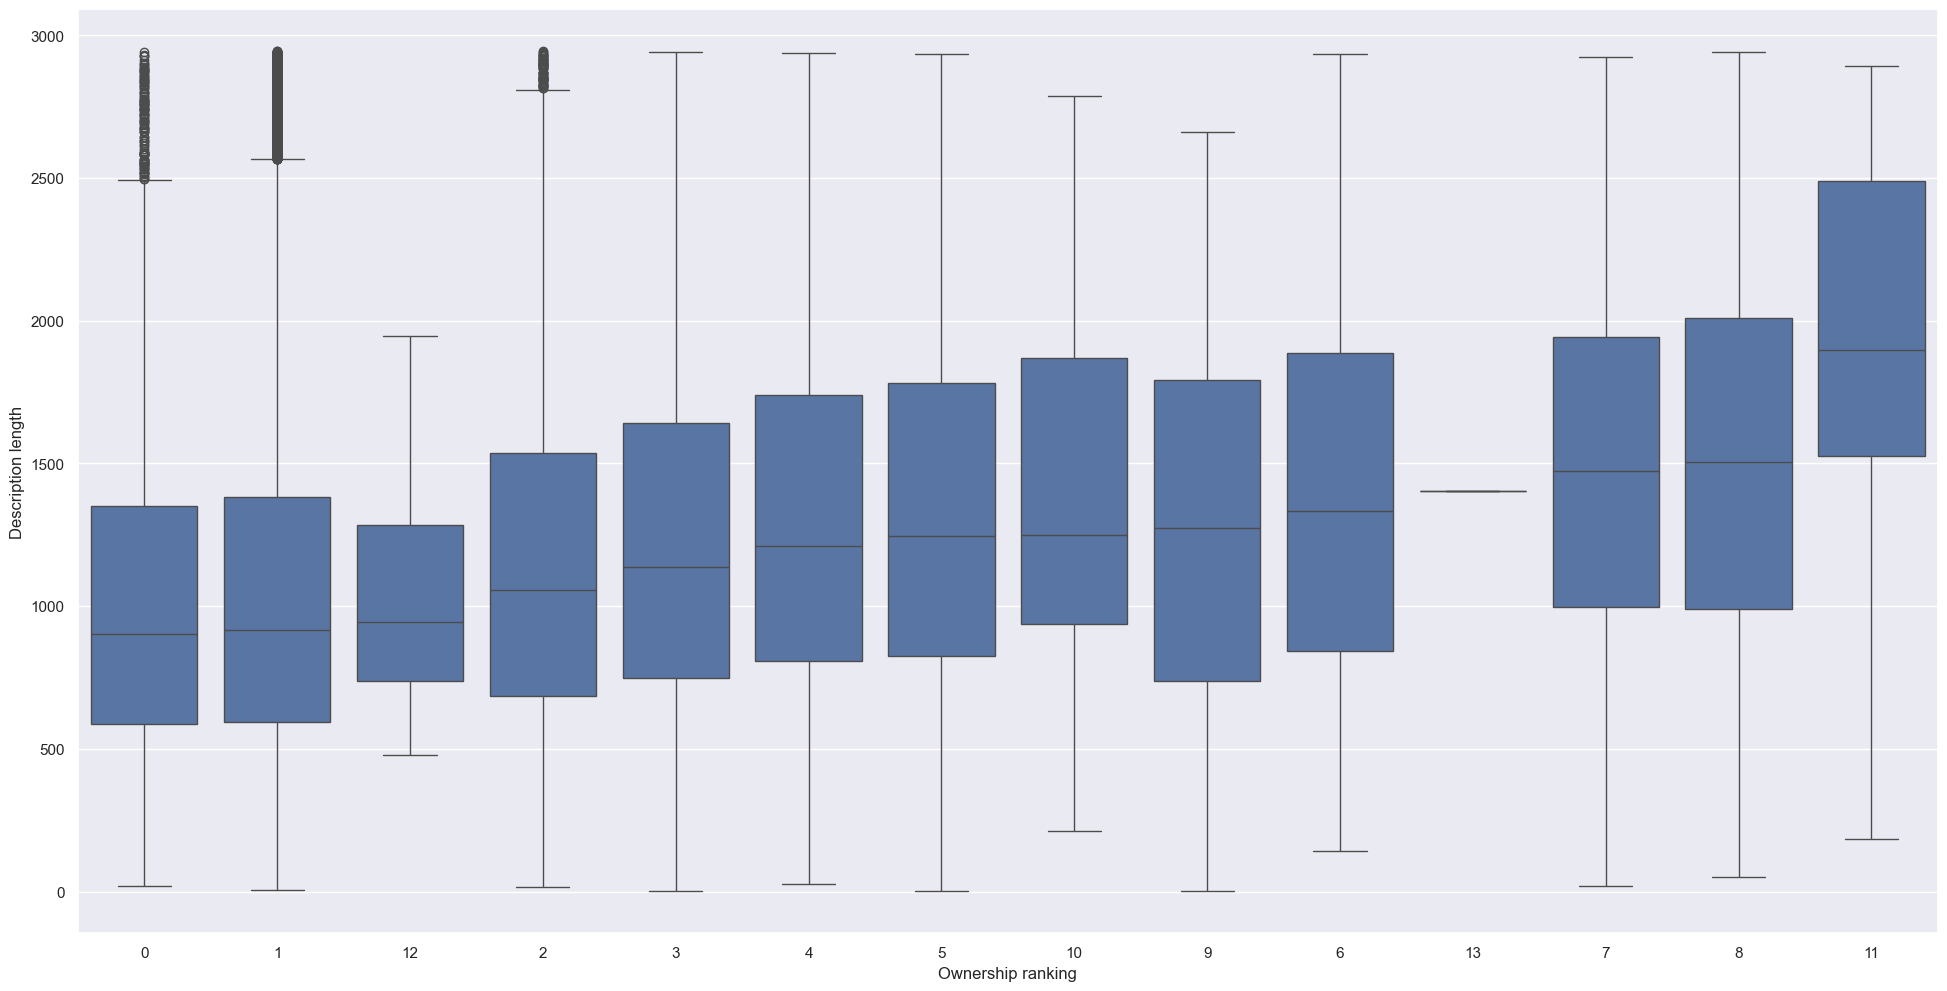

In [442]:
# Draw the distributions of all variables
f, axes = plt.subplots(1, 1, figsize=(24, 12))

grp = data3.loc[:,['Ownership ranking', 'Description length']].groupby(['Ownership ranking']).median().sort_values(by='Description length')
sb.boxplot(data = data3, x = data3['Ownership ranking'], y=data3['Description length'], orient = "v", order=grp.index)

In [443]:
print(data3.corr())

                    Ownership ranking  Description length
Ownership ranking            1.000000            0.153123
Description length           0.153123            1.000000


While the boxplots is more readable in this, but it still appears that there is not much correlation between the length of the description and the ownership ranking. While games with shorter average description length tends to also have lower ownership ranking (ranking 0 - 5), but it is not definitive enough to correlate them.

### 5) Predicting Ownership ranking using Metacritic score

In all the different factors that we explored with, metacritic score seems to be the best performing indicator on how well a game would perform. Hence, we will be trying a simple classification tree model to use metacritic score to predict ownership ranking. We will rate games with ownership ranking greater than 5 as performing well, and those 5 and below as not performing well.

In [465]:
data3 = pd.DataFrame(data2[["Ownership ranking", "Metacritic score"]])
d = {range(0, 6): 0, range(6, 14): 1}
data3['Ownership ranking'] = data3['Ownership ranking'].apply(lambda x: next((v for k, v in d.items() if x in k), 0)).astype('bool')
ownership = pd.DataFrame(data3['Ownership ranking'])
score = pd.DataFrame(data3['Metacritic score'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(score, ownership, test_size = 0.25)

In [468]:
y_train['Ownership ranking'].value_counts()

Ownership ranking
False    52445
True      1342
Name: count, dtype: int64

In [469]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'Metacritic score <= 69.5\ngini = 0.049\nsamples = 53787\nvalue = [52445, 1342]\nclass = Poor'),
 Text(0.25, 0.625, 'Metacritic score <= 58.5\ngini = 0.028\nsamples = 51894\nvalue = [51164, 730]\nclass = Poor'),
 Text(0.125, 0.375, 'Metacritic score <= 38.5\ngini = 0.025\nsamples = 51259\nvalue = [50598, 661]\nclass = Poor'),
 Text(0.0625, 0.125, 'gini = 0.025\nsamples = 50993\nvalue = [50345, 648]\nclass = Poor'),
 Text(0.1875, 0.125, 'gini = 0.093\nsamples = 266\nvalue = [253, 13]\nclass = Poor'),
 Text(0.375, 0.375, 'Metacritic score <= 65.5\ngini = 0.194\nsamples = 635\nvalue = [566, 69]\nclass = Poor'),
 Text(0.3125, 0.125, 'gini = 0.224\nsamples = 303\nvalue = [264, 39]\nclass = Poor'),
 Text(0.4375, 0.125, 'gini = 0.164\nsamples = 332\nvalue = [302, 30]\nclass = Poor'),
 Text(0.75, 0.625, 'Metacritic score <= 82.5\ngini = 0.438\nsamples = 1893\nvalue = [1281, 612]\nclass = Poor'),
 Text(0.625, 0.375, 'Metacritic score <= 77.5\ngini = 0.375\nsamples = 1448\nvalu

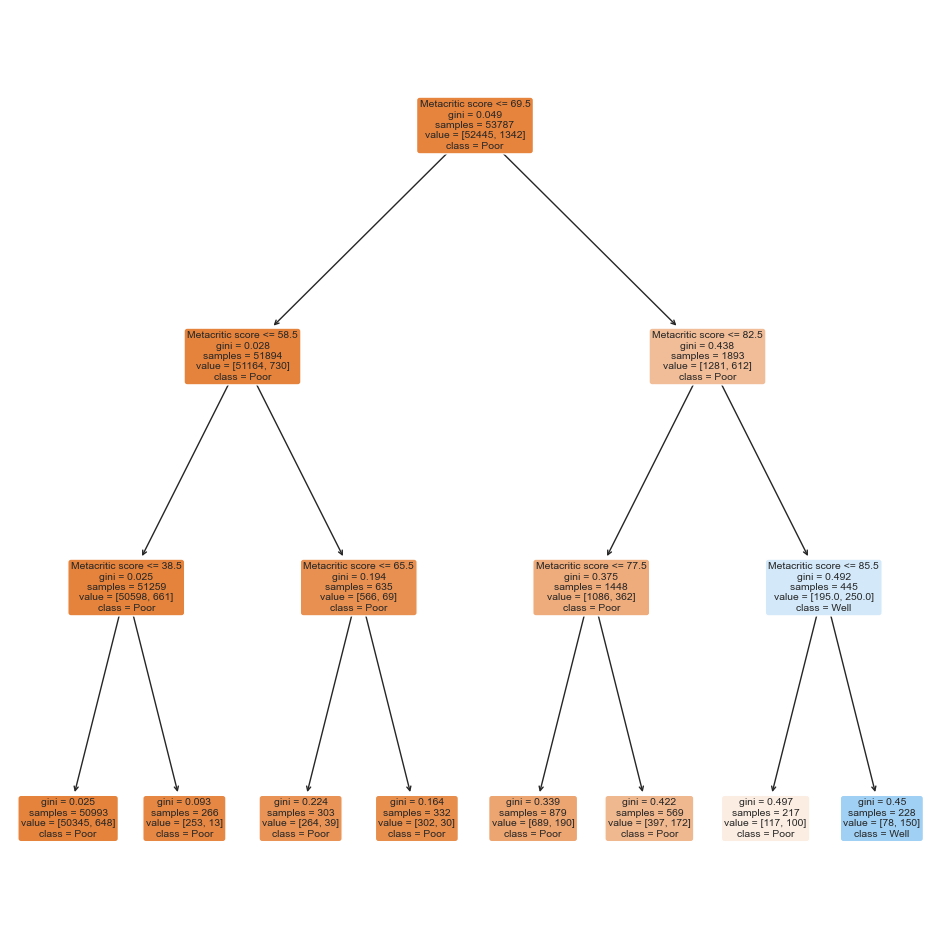

In [470]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Metacritic score"], 
          class_names=["Poor","Well"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9763883466265083

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9728930782531094



<Axes: >

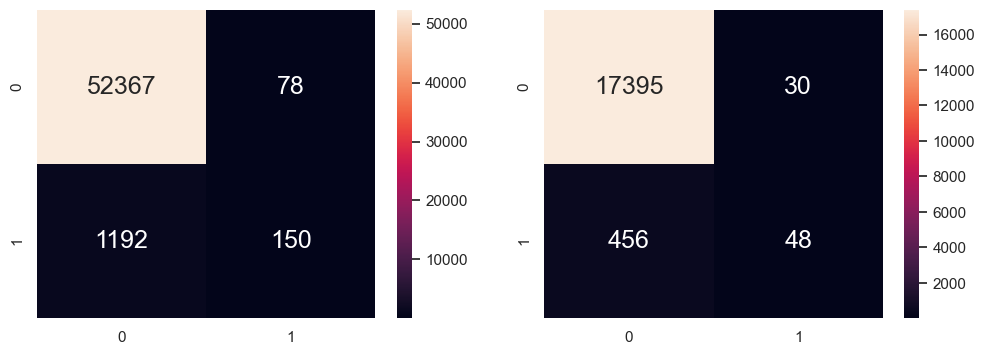

In [471]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [473]:
print("Metrics for Decision Tree:")
print()
cm = confusion_matrix(y_train, y_train_pred)
print("True Positive Rate(Train): ")
print(cm[1][1]/(cm[1][1]+cm[1][0]))
print("True Negative Rate(Train): ")
print(cm[0][0]/(cm[0][0]+cm[0][1]))
print("False Positive Rate(Train): ")
print(cm[0][1]/(cm[0][1]+cm[0][0]))
print()

cm2 = confusion_matrix(y_test, y_test_pred)
print("True Positive Rate(Test): ")
print(cm2[1][1]/(cm2[1][1]+cm2[1][0]))
print("True Negative Rate(Test): ")
print(cm2[0][0]/(cm2[0][0]+cm2[0][1]))
print("False Positive Rate(Test): ")
print(cm2[0][1]/(cm2[0][1]+cm2[0][0]))

Metrics for Decision Tree:

True Positive Rate(Train): 
0.11177347242921014
True Negative Rate(Train): 
0.9985127276194108
False Positive Rate(Train): 
0.0014872723805891886

True Positive Rate(Test): 
0.09523809523809523
True Negative Rate(Test): 
0.9982783357245337
False Positive Rate(Test): 
0.001721664275466284


#### Model analysis
For our training model, we achieve a classification accuracy of about 0.97. Hence will do quite well in predicting how well a game does from a given Metacritic score. We can further see this from the high true negative rate of 0.99. However, the true positive rate is quite low for our model at about 0.1. This means that our model will tend to "under-predict". In a well performing game, it may tend to predict it as a poor performing game based on the Metacritic score. As mentioned in section 2, this is likely because it is impossible for metacritic to rate all the games out in the market, hence our training data will have some skew towards a "0" score. But overall, it serves as a fairly accurate model.

We will now run the model using a dataset with Metacritic score of '0' removed. Hopefully, this would help make the model better by improving the True Positive rate. And so, it will not "under-predict". We will also increase the depth of the classification tree in hopes that it will allow the model to train for longer and score better.

In [ ]:
data3 = pd.DataFrame(data2[["Ownership ranking", "Metacritic score"]])
data3 = data3[data3['Metacritic score']>0]
d = {range(0, 6): 0, range(6, 14): 1}
data3['Ownership ranking'] = data3['Ownership ranking'].apply(lambda x: next((v for k, v in d.items() if x in k), 0)).astype('bool')
ownership = pd.DataFrame(data3['Ownership ranking'])
score = pd.DataFrame(data3['Metacritic score'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(score, ownership, test_size = 0.25)

In [ ]:
y_train['Ownership ranking'].value_counts()

Ownership ranking
False    2117
True      716
Name: count, dtype: int64

In [ ]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=5)

[Text(0.4494047619047619, 0.9166666666666666, 'Metacritic score <= 79.5\ngini = 0.378\nsamples = 2833\nvalue = [2117.0, 716.0]\nclass = Poor'),
 Text(0.24404761904761904, 0.75, 'Metacritic score <= 71.5\ngini = 0.288\nsamples = 2048\nvalue = [1690, 358]\nclass = Poor'),
 Text(0.13095238095238096, 0.5833333333333334, 'Metacritic score <= 58.5\ngini = 0.207\nsamples = 1111\nvalue = [981, 130]\nclass = Poor'),
 Text(0.07142857142857142, 0.4166666666666667, 'Metacritic score <= 56.5\ngini = 0.081\nsamples = 284\nvalue = [272, 12]\nclass = Poor'),
 Text(0.047619047619047616, 0.25, 'Metacritic score <= 50.5\ngini = 0.102\nsamples = 223\nvalue = [211, 12]\nclass = Poor'),
 Text(0.023809523809523808, 0.08333333333333333, 'gini = 0.056\nsamples = 104\nvalue = [101, 3]\nclass = Poor'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.14\nsamples = 119\nvalue = [110, 9]\nclass = Poor'),
 Text(0.09523809523809523, 0.25, 'gini = 0.0\nsamples = 61\nvalue = [61, 0]\nclass = Poor'),
 Text(0.1

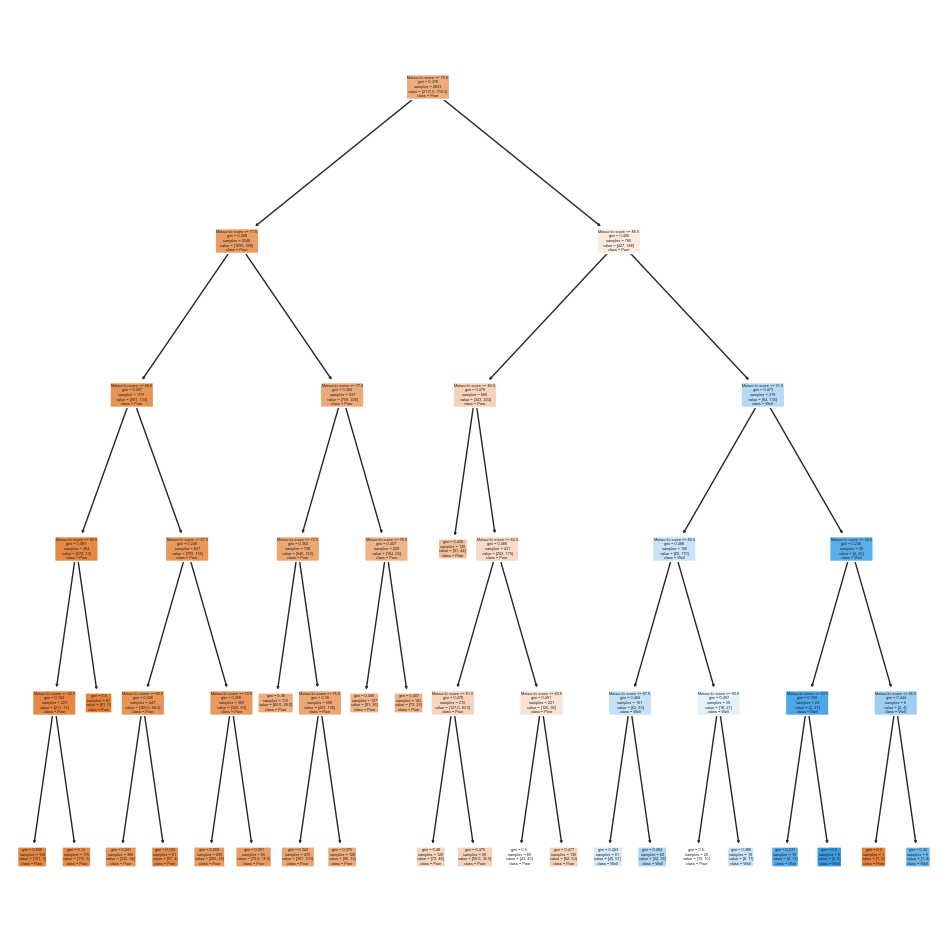

In [ ]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Metacritic score"], 
          class_names=["Poor","Well"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7656194846452524

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.780952380952381



<Axes: >

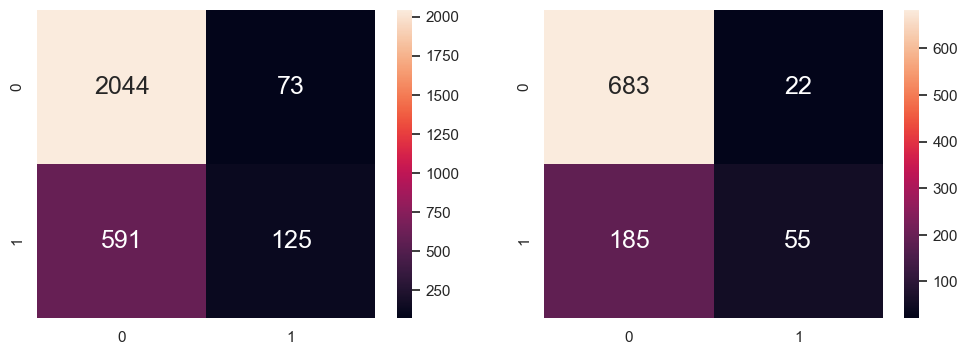

In [ ]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [ ]:
print("Metrics for Decision Tree:")
print()
cm = confusion_matrix(y_train, y_train_pred)
print("True Positive Rate(Train): ")
print(cm[1][1]/(cm[1][1]+cm[1][0]))
print("True Negative Rate(Train): ")
print(cm[0][0]/(cm[0][0]+cm[0][1]))
print("False Positive Rate(Train): ")
print(cm[0][1]/(cm[0][1]+cm[0][0]))
print()

cm2 = confusion_matrix(y_test, y_test_pred)
print("True Positive Rate(Test): ")
print(cm2[1][1]/(cm2[1][1]+cm2[1][0]))
print("True Negative Rate(Test): ")
print(cm2[0][0]/(cm2[0][0]+cm2[0][1]))
print("False Positive Rate(Test): ")
print(cm2[0][1]/(cm2[0][1]+cm2[0][0]))

Metrics for Decision Tree:

True Positive Rate(Train): 
0.17458100558659218
True Negative Rate(Train): 
0.9655172413793104
False Positive Rate(Train): 
0.034482758620689655

True Positive Rate(Test): 
0.22916666666666666
True Negative Rate(Test): 
0.9687943262411347
False Positive Rate(Test): 
0.031205673758865248


### New model analysis

For our new model, while the classification accuracy dropped from our previous model, it is still decent at about 0.77. With this new model, we manage to double our true positive rate. While the true positive rate is still not very high at about 0.2, but there is some improvement from the old model. The true negative rate slightly dip to 0.96 from the 0.99, but is still relatively high. False positive rate remains low as well at around 0.03. Therefore, we feel that this model will perform well enough to assist us in predicting how well a game would be from a given metacritic score.